#MNIST Hand-written digit recognition using CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import numpy as np
import matplotlib.pyplot as plt


#PREPARING THE DATASET




In [ ]:
#Importing the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:

# Reshaping the data
#Creating single channel images to obtain grayscale images
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# Normalize the data
# We are normalizing the data to make sure that the single values lie between 0 and 1 and not between 0 and 255
train_images = train_images / 255.0
test_images = test_images / 255.0

#CREATING THE ARCHITECTURE OF THE MODEL

In [ ]:
# Define the model
model = Sequential()                                                                 # Sequential() is for stacking multiple layers on top of each other
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))            # input_shape specifies the dimensions of the image. The third parameter "1" stands for color channel (it's 1 for a greyscale images)
model.add(MaxPool2D(2, 2))                                                           # the function MaxPool2D() is for pooling the data. Pooling reduces the size of our image and highlights the important information
model.add(Flatten())                                                                 # The function Flatten() converts the pixels data into 1D array
model.add(Dense(128, activation='relu'))                                             # The Dense function creates a layer in our neural network
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#TRAINING THE MODEL

In [ ]:
train_result = model.fit(train_images, train_labels, validation_split=0.15, batch_size = 100, epochs=10, verbose=2)
print(np.array(train_result))

Epoch 1/10
510/510 - 23s - loss: 0.2324 - accuracy: 0.9338 - val_loss: 0.0950 - val_accuracy: 0.9738 - 23s/epoch - 45ms/step
Epoch 2/10
510/510 - 18s - loss: 0.0697 - accuracy: 0.9791 - val_loss: 0.0636 - val_accuracy: 0.9823 - 18s/epoch - 36ms/step
Epoch 3/10
510/510 - 19s - loss: 0.0470 - accuracy: 0.9854 - val_loss: 0.0638 - val_accuracy: 0.9816 - 19s/epoch - 36ms/step
Epoch 4/10
510/510 - 18s - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0568 - val_accuracy: 0.9834 - 18s/epoch - 36ms/step
Epoch 5/10
510/510 - 19s - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0542 - val_accuracy: 0.9856 - 19s/epoch - 37ms/step
Epoch 6/10
510/510 - 18s - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0513 - val_accuracy: 0.9849 - 18s/epoch - 36ms/step
Epoch 7/10
510/510 - 18s - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0533 - val_accuracy: 0.9850 - 18s/epoch - 36ms/step
Epoch 8/10
510/510 - 18s - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0622 - val_accuracy: 0.9827 - 18s/epoch - 36ms/step


#TESTING THE MODEL

In [ ]:
prediction = model.evaluate(test_images, test_labels)
print(np.array(prediction))

313/313 [==============================] - 2s 6ms/step - loss: 0.0509 - accuracy: 0.9861
[0.05093804 0.98610002]


In [ ]:
test_result = model.predict(x=test_images, verbose=2)
print(test_result)

313/313 - 2s - 2s/epoch - 6ms/step
[[9.57910227e-12 7.23033466e-10 1.09106722e-07 ... 9.99999821e-01
  4.53970594e-09 1.71500147e-10]
 [1.22576682e-09 1.49949244e-07 9.99999821e-01 ... 3.38687791e-13
  8.53559064e-12 4.04862504e-13]
 [2.34256134e-08 9.99997437e-01 1.13255965e-08 ... 2.26432022e-07
  2.33551589e-07 6.50328125e-10]
 ...
 [7.36487471e-17 1.30811681e-12 1.76364254e-14 ... 1.42985092e-12
  6.13954887e-10 1.09720955e-10]
 [3.92350423e-11 8.87863567e-13 5.63671661e-14 ... 6.46766668e-11
  4.07750622e-06 3.73981174e-13]
 [4.96909642e-13 4.18887612e-18 2.27112369e-14 ... 4.39811766e-18
  2.76933339e-14 3.87163048e-15]]


#DISPLAYING FEW OF THE TEST RESULTS

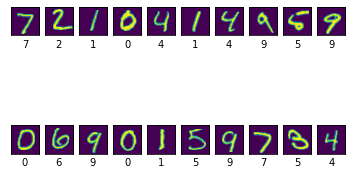

In [ ]:
for i in range(20):
  plt.subplot(2, 10, i+1)
  pixels = test_images[i].reshape((28, 28))
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])
  plt.imshow(pixels)
  plt.xlabel(list(test_result[i]).index(max(test_result[i])))                     #We labelled the images that were fed into model with the value predicted by it
plt.show()

##We observe that among the 20 images above, 19 of them have been predicted correctly and 1 has been predicted incorrectly

## CONFUSION MATRIX

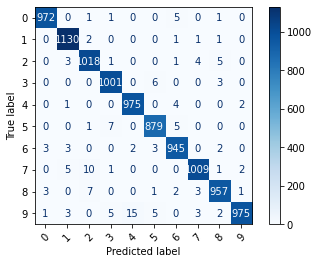

In [ ]:
cm = confusion_matrix(np.array(test_labels), np.argmax(test_result,axis=1))         #creating a confusion matrix for true and predicted data

target_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]                   #adding labels to all rows and columns
disp = ConfusionMatrixDisplay(cm, display_labels=target_names)                      #displaying the confusion matrix
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.savefig("conf.png")